# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [218]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [220]:
# importing the warnings 
import warnings
warnings.filterwarnings("ignore")

In [222]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r"C:\Users\jaina\Downloads\porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [224]:
df.shape

(175777, 14)

In [228]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [233]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [234]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [238]:
# Convert categorical features to category type
categorical_columns = ['market_id' , 'store_primary_category' , 'order_protocol']
for col in categorical_columns:
    df[col]=df[col].astype('category')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [244]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.seconds/60

In [246]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  
0                      21.0     34.44                   47.0  
1                       2.0     27.60                   44.0  
2                      18.0     11.56                   55.0  
3                       8.0     31.80                   59.0  
4                       7.0      8.20                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [249]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['is_weekend'] = df['created_at'].dt.dayofweek.apply(lambda x: 0 if x < 5 else 1)
df['day_of_week'] = df['created_at'].dt.dayofweek 
# Create a categorical feature 'isWeekend'
df['is_weekend'] = df['is_weekend'].astype('category')
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  created_hour  \
0                      21.0     34.44                   47.0            22   
1                       2.0     27.60                   44.0            21   
2                      18.0     11.56                   55.0             0   
3                       8.0     31.80                   59.0             3   
4                       7.0      8.20                   46.0             2   

  is_weekend  day_of_week  
0          0            4  
1          0            1  
2          0            0  
3          0            3  
4          0            1

In [252]:
# Drop unnecessary columns
df = df.drop(columns=['created_at', 'actual_delivery_time', 'store_primary_category'])
df.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
0       1.0            1.0            4      3441                   4   
1       2.0            2.0            1      1900                   1   
2       2.0            3.0            4      4771                   3   
3       1.0            1.0            1      1525                   1   
4       1.0            1.0            2      3620                   2   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2             820            1604                    8.0                 6.0   
3            1525            1525                    5.0                 6.0   
4            1425            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  created_hour  \
0                      21.0     34.44                   47.0            22   
1                       2.0     27.60                   44.0            21   
2                      18.0     11.56                   55.0             0   
3                       8.0     31.80                   59.0             3   
4                       7.0      8.20                   46.0             2   

  is_weekend  day_of_week  
0          0            4  
1          0            1  
2          0            0  
3          0            3  
4          0            1

In [254]:
df.shape

(175777, 15)

In [256]:
df = df.drop_duplicates()
df.shape

(175762, 15)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [260]:
# Define target variable (y) and features (X)
target_var = 'delivery_time_minutes'
X = df.drop(columns=[target_var])
y = df[target_var]
X.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
0       1.0            1.0            4      3441                   4   
1       2.0            2.0            1      1900                   1   
2       2.0            3.0            4      4771                   3   
3       1.0            1.0            1      1525                   1   
4       1.0            1.0            2      3620                   2   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2             820            1604                    8.0                 6.0   
3            1525            1525                    5.0                 6.0   
4            1425            2195                    5.0                 5.0   

   total_outstanding_orders  distance  created_hour is_weekend  day_of_week  
0                      21.0     34.44            22          0            4  
1                       2.0     27.60            21          0            1  
2                      18.0     11.56             0          0            0  
3                       8.0     31.80             3          0            3  
4                       7.0      8.20             2          0            1

In [262]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_time_minutes, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [265]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140609, 14)
(35153, 14)
(140609,)
(35153,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [269]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Printing outputs
print("Numerical columns:", numerical_columns)

print("Categorical columns:", categorical_columns)


Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'created_hour', 'day_of_week']
Categorical columns: ['market_id', 'order_protocol', 'is_weekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [272]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20,20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(X_train[col], kde=True, bins=30, color='red')
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

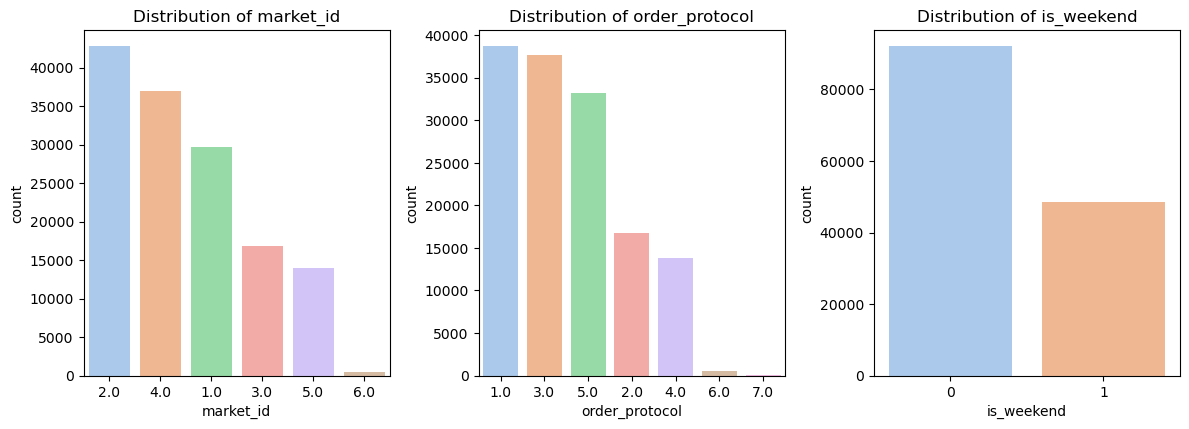

In [274]:
# Distribution of categorical columns
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=X_train[col], order=X_train[col].value_counts().index, palette='pastel')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

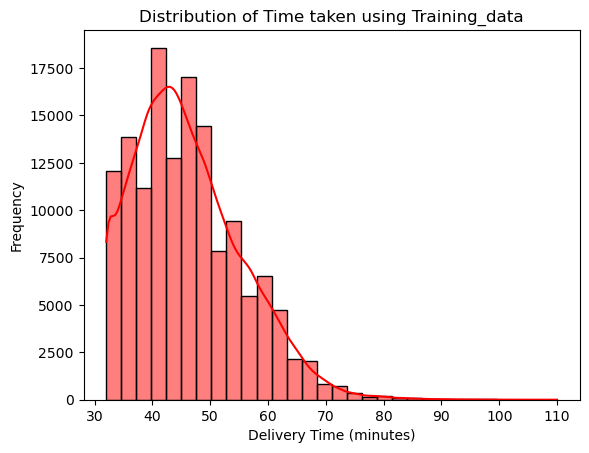

In [276]:
# Distribution of time_taken
sns.histplot(y_train, bins=30, kde=True, color='red')

plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Time taken using Training_data")

plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

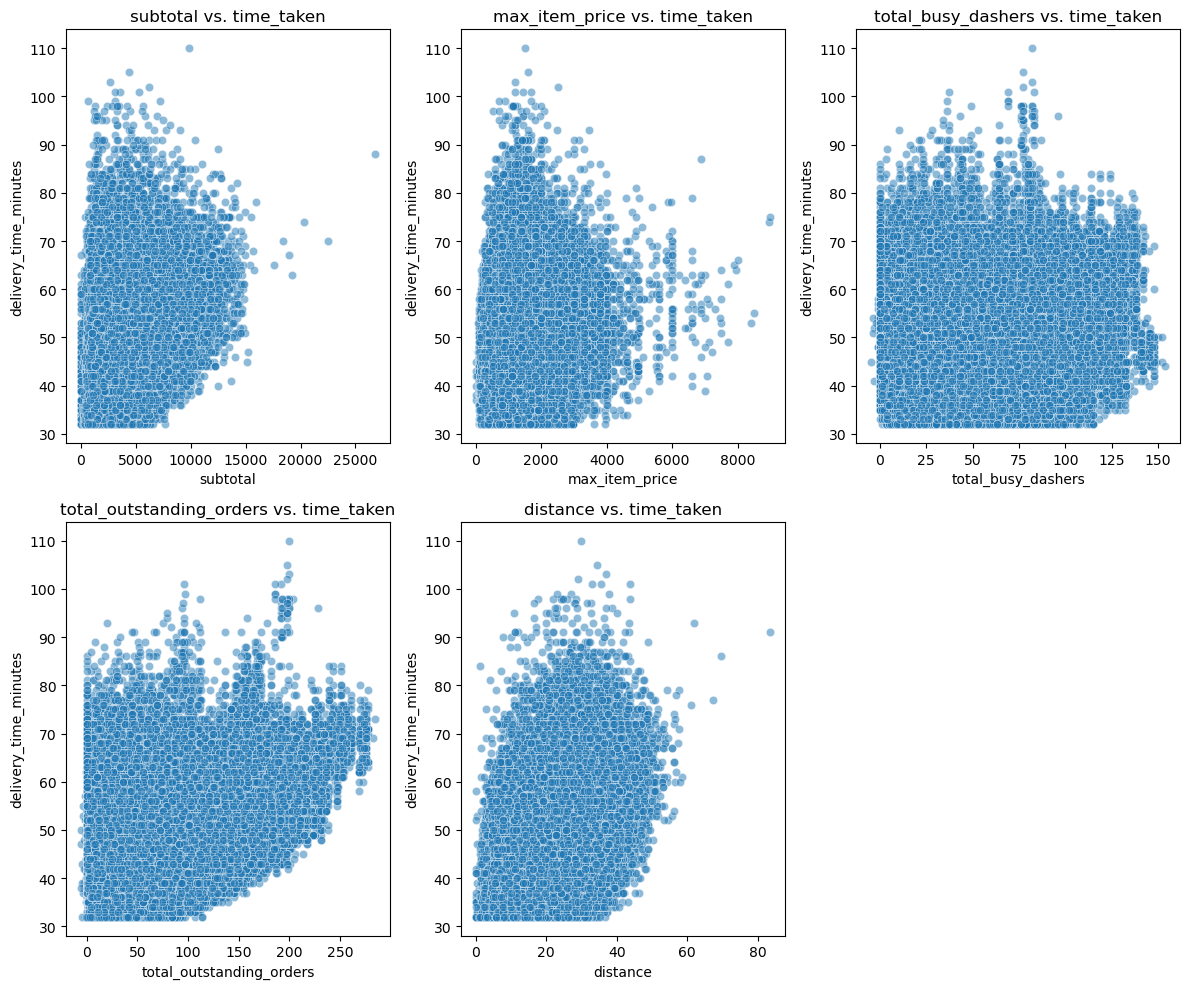

In [279]:
# Scatter plot to visualise the relationship between time_taken and other features
important_features = ['subtotal', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(important_features):
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col} vs. time_taken')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


In [280]:
# Show the distribution of time_taken for different hours
sns.scatterplot(x=X_train['created_hour'], y=y_train, alpha=0.5, color='red')
plt.xlabel("created_hour")
plt.ylabel("Time Taken (minutes)")
plt.title("Time Taken aross different Hours of the Day")
plt.xticks(range(0, 24))
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

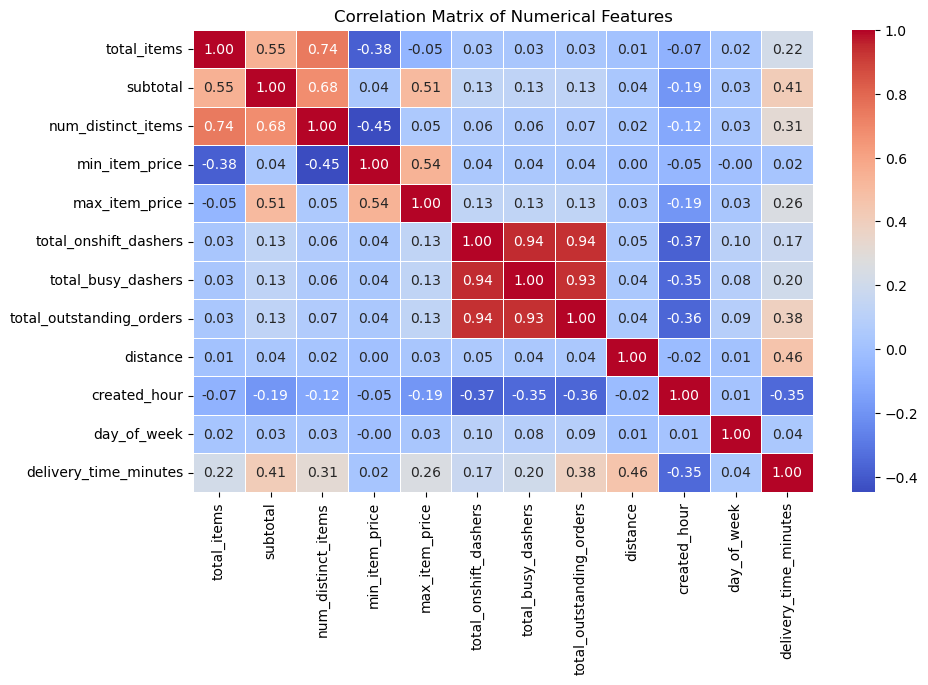

In [283]:
# Plot the heatmap of the correlation matrix
correlation_matrix = X_train[numerical_columns].join(y_train).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [285]:
# Drop 3-5 weakly correlated columns from training dataset
 # computing correlations
correlations = X_train[numerical_columns].corrwith(y_train)

 # Dropping weak features
threshold = 0.1
weak_features = correlations[abs(correlations) < threshold].index.tolist()
weak_features

['min_item_price', 'day_of_week']

In [286]:
# Dropping features from X_train and X_test
X_train = X_train.drop(columns=weak_features)
X_train.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
29429        4.0            2.0            4      3590                   3   
141821       1.0            5.0            3      3184                   3   
32757        4.0            1.0            5      6545                   5   
46717        1.0            1.0            4      4700                   4   
42092        3.0            2.0            6      5925                   2   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
29429             1195                   96.0                94.0   
141821             968                   21.0                16.0   
32757             1499                   50.0                42.0   
46717             1600                    5.0                 5.0   
42092             1095                   46.0                46.0   

        total_outstanding_orders  distance  created_hour is_weekend  
29429                      152.0     20.68             1          0  
141821                      13.0     17.72             3          0  
32757                       78.0     18.28             1          0  
46717                        7.0     13.32             2          0  
42092                       46.0     10.60             2          0

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

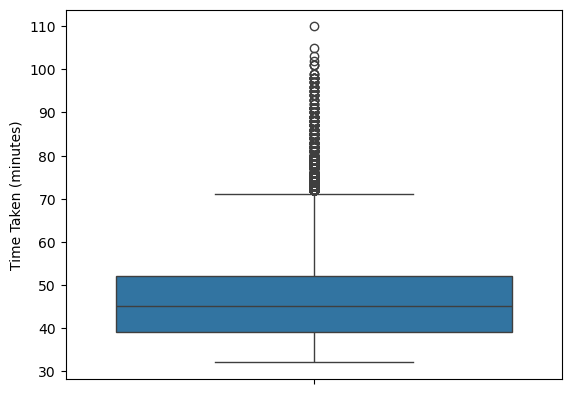

In [289]:
# Boxplot for time_taken
sns.boxplot(y=y_train)
plt.ylabel("Time Taken (minutes)")

plt.show()


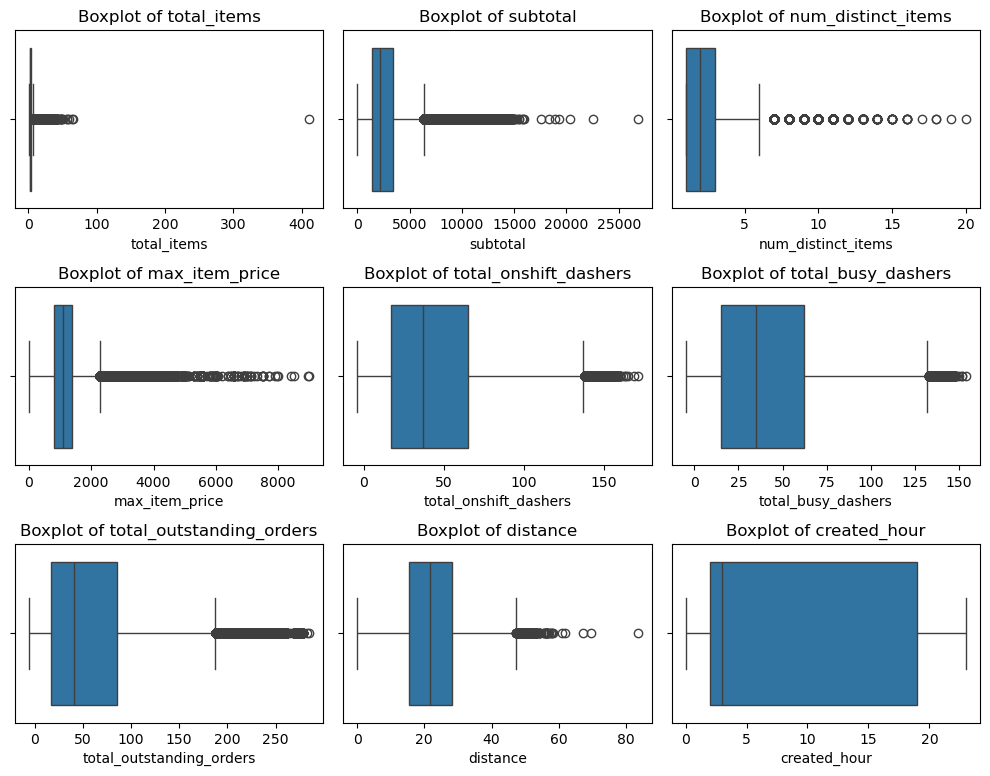

In [290]:
# Boxplots for numerical features
numerical_columns = X_train.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,10))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [292]:
# Handle outliers
def capping_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # caping the lower bound and upper bound
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# 'num_distinct_items' as represents unique item counts in an order, so high values are valid
capping_columns = [col for col in numerical_columns if col != "num_distinct_items"]
X_train = capping_outliers(X_train, capping_columns)

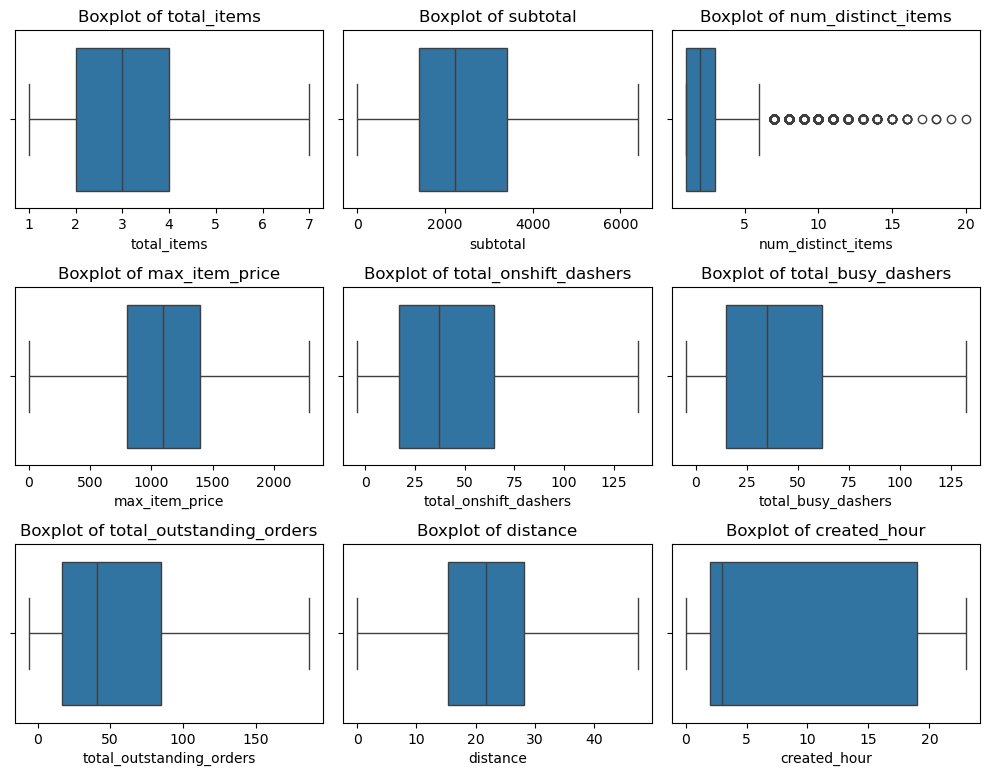

In [293]:
# Checking the distribution after the capping
plt.figure(figsize=(10,10))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [295]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_test.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X_test.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Printing outputs
print("Numerical columns:", numerical_columns)

print("Categorical columns:", categorical_columns)



Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'created_hour', 'day_of_week']
Categorical columns: ['market_id', 'order_protocol', 'is_weekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [298]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20,20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(X_test[col], kde=True, bins=30, color='red')
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

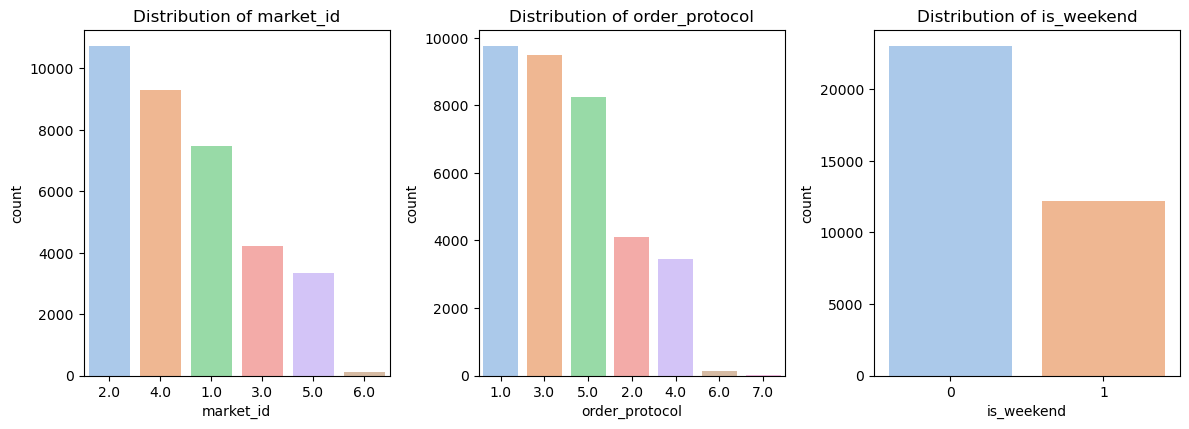

In [300]:
# Distribution of categorical columns
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=X_test[col], order=X_test[col].value_counts().index, palette='pastel')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

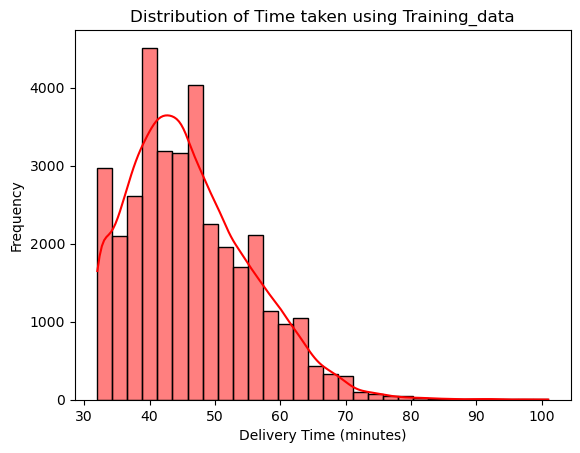

In [303]:
# Distribution of time_taken
sns.histplot(y_test, bins=30, kde=True, color='red')

plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Time taken using Training_data")

plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

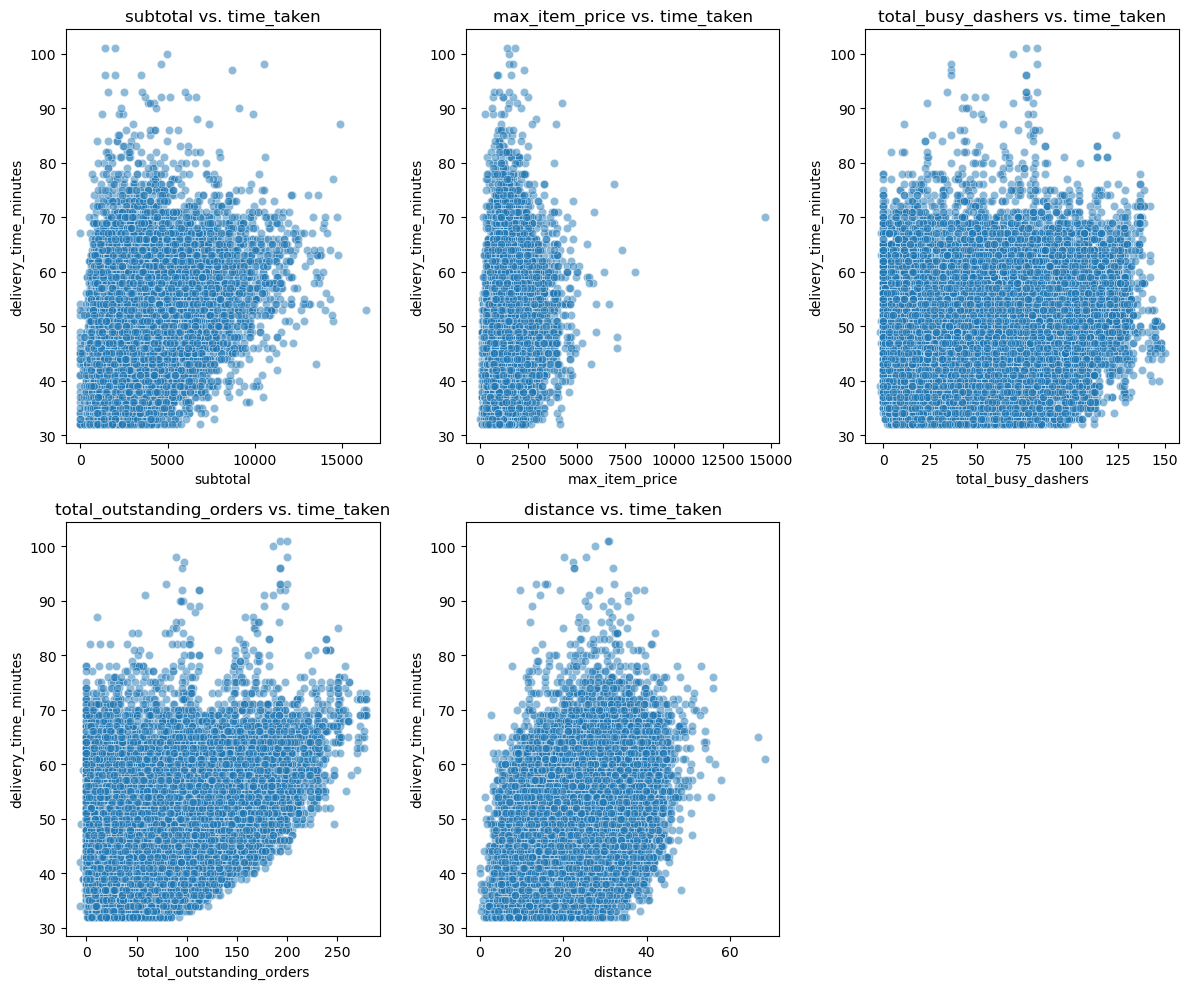

In [305]:
# Scatter plot to visualise the relationship between time_taken and other features
important_features = ['subtotal', 'max_item_price', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(important_features):
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col} vs. time_taken')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [307]:
# Drop the weakly correlated columns from training dataset
X_test = X_test.drop(columns=weak_features)

# capping the X_test to maintain the cosistency with training data; 
numerical_columns = X_test.select_dtypes(include=['number']).columns
capping_columns = [col for col in numerical_columns if col != "num_distinct_items"]
X_test = capping_outliers(X_test, capping_columns)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140609, 12)
(35153, 12)
(140609,)
(35153,)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [313]:
# Import libraries
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [324]:
# Apply scaling to the numerical columns
# Use standard scaler as it ensures all features have mean = 0 and standard deviation = 1. This support better for Linear Regression
test_num_cols = X_train.select_dtypes(include=['number']).columns.tolist()

scaler = StandardScaler()

# keeping the original data (unscaled data) to compare later
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# scaling the data
X_train_scaled[test_num_cols] = scaler.fit_transform(X_train[test_num_cols])
X_test_scaled[test_num_cols] = scaler.transform(X_test[test_num_cols])

X_train_scaled.head()


market_id order_protocol  total_items  subtotal  num_distinct_items  \
29429        4.0            2.0     0.559973  0.642631            0.199152   
141821       1.0            5.0    -0.009127  0.377376            0.199152   
32757        4.0            1.0     1.129072  2.473936            1.427499   
46717        1.0            1.0     0.559973  1.367836            0.813326   
42092        3.0            2.0     1.698172  2.168174           -0.415021   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
29429         0.130916               1.492231            1.627877   
141821       -0.358700              -0.694441           -0.805047   
32757         0.786614               0.151072            0.005928   
46717         1.004461              -1.160931           -1.148151   
42092        -0.084774               0.034450            0.130693   

        total_outstanding_orders  distance  created_hour is_weekend  
29429                   1.864033 -0.131661     -0.861635          0  
141821                 -0.877504 -0.471083     -0.631094          0  
32757                   0.404510 -0.406868     -0.861635          0  
46717                  -0.995843 -0.975627     -0.746365          0  
42092                  -0.226635 -1.287528     -0.746365          0

In [326]:
X_train_scaled.describe()

total_items      subtotal  num_distinct_items  max_item_price  \
count  1.406090e+05  1.406090e+05        1.406090e+05    1.406090e+05   
mean  -6.468254e-18 -1.091518e-17       -2.385169e-17   -9.146515e-18   
std    1.000004e+00  1.000004e+00        1.000004e+00    1.000004e+00   
min   -1.147326e+00 -1.702850e+00       -1.029194e+00   -2.446578e+00   
25%   -5.782264e-01 -7.796842e-01       -1.029194e+00   -7.232157e-01   
50%   -9.126866e-03 -2.511343e-01       -4.150209e-01   -8.477350e-02   
75%    5.599727e-01  5.217638e-01        1.991524e-01    5.622963e-01   
max    2.267271e+00  2.473936e+00        1.064010e+01    2.490564e+00   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count           1.406090e+05        1.406090e+05              1.406090e+05   
mean           -2.556982e-17        1.303757e-17             -1.278491e-17   
std             1.000004e+00        1.000004e+00              1.000004e+00   
min            -1.423332e+00       -1.460065e+00             -1.252246e+00   
25%            -8.110633e-01       -8.362381e-01             -7.986104e-01   
50%            -2.279507e-01       -2.124116e-01             -3.252515e-01   
75%             5.884069e-01        6.297543e-01              5.425731e-01   
max             2.687612e+00        2.828743e+00              2.554348e+00   

           distance  created_hour  
count  1.406090e+05  1.406090e+05  
mean  -3.029467e-17  3.006727e-17  
std    1.000004e+00  1.000004e+00  
min   -2.503022e+00 -9.769061e-01  
25%   -7.462889e-01 -7.463646e-01  
50%   -7.818575e-03 -6.310939e-01  
75%    7.214782e-01  1.213238e+00  
max    2.923129e+00  1.674321e+00

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [331]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train)

lr_model = sm.OLS(y_train, X_train_sm).fit()

print(lr_model.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.865
Model:                               OLS   Adj. R-squared:                  0.865
Method:                    Least Squares   F-statistic:                 7.532e+04
Date:                   Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                           20:29:50   Log-Likelihood:            -3.7255e+05
No. Observations:                 140609   AIC:                         7.451e+05
Df Residuals:                     140596   BIC:                         7.453e+05
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [333]:
# Train the model using the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [335]:
# Make predictions
y_pred = lr.predict(X_test_scaled)
y_pred[:10]

array([41.03050261, 53.28653302, 45.87134092, 45.32638664, 39.89369811,
       50.66911581, 51.86625462, 46.91006002, 41.08148574, 30.7006665 ])

In [337]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))



MAE: 2.46
MSE: 11.59
RMSE: 3.4
R²: 0.8665


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [342]:
# Loop through the number of features and test the model
# Let's try using 1 feature, then 2, up to all of them!
for how_many in range(1, X_train.shape[1] + 1):
    # Make a model
    lr = LinearRegression()

    # RFE helps pick the best ones
    rfe = RFE (lr, n_features_to_select=how_many)
    rfe.fit(X_train, y_train)

    # Pick those features
    best_features = X_train.columns[rfe.support_]

    # Train the model using just the best ones
    lr.fit(X_train[best_features], y_train)

    # Make predictions
    y_pred = lr.predict(X_test[best_features])

    # Check how good we did
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Print results like a scoreboard
    print(f"{how_many:^8} | {rmse:<6.2f} | {r2:.4f}")


   1     | 8.62   | 0.1426
   2     | 7.07   | 0.4242
   3     | 6.93   | 0.4470
   4     | 5.41   | 0.6628
   5     | 4.25   | 0.7920
   6     | 3.78   | 0.8354
   7     | 3.70   | 0.8422
   8     | 3.67   | 0.8450
   9     | 3.53   | 0.8562
   10    | 3.41   | 0.8657
   11    | 3.41   | 0.8661
   12    | 3.40   | 0.8665


In [343]:
# Build the final model with selected number of features
final_lr = LinearRegression()

# RFE to select top 8 features
final_rfe = RFE(final_lr, n_features_to_select=8)
final_rfe.fit(X_train, y_train)

# Get those 8 best features
final_features = X_train.columns[final_rfe.support_]
print("Final selected features:", list(final_features))

# Train the model on training data
final_lr.fit(X_train[final_features], y_train)

# Predict on test data
final_preds = final_lr.predict(X_test[final_features])

# Evaluate final model
final_rmse = mean_squared_error(y_test, final_preds, squared=False)
final_r2 = r2_score(y_test, final_preds)

print("\nFinal Model Performance:")
print(f"RMSE : {final_rmse:.2f}")
print(f"R²   : {final_r2:.4f}")

Final selected features: ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'created_hour', 'is_weekend']

Final Model Performance:
RMSE : 3.67
R²   : 0.8450


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

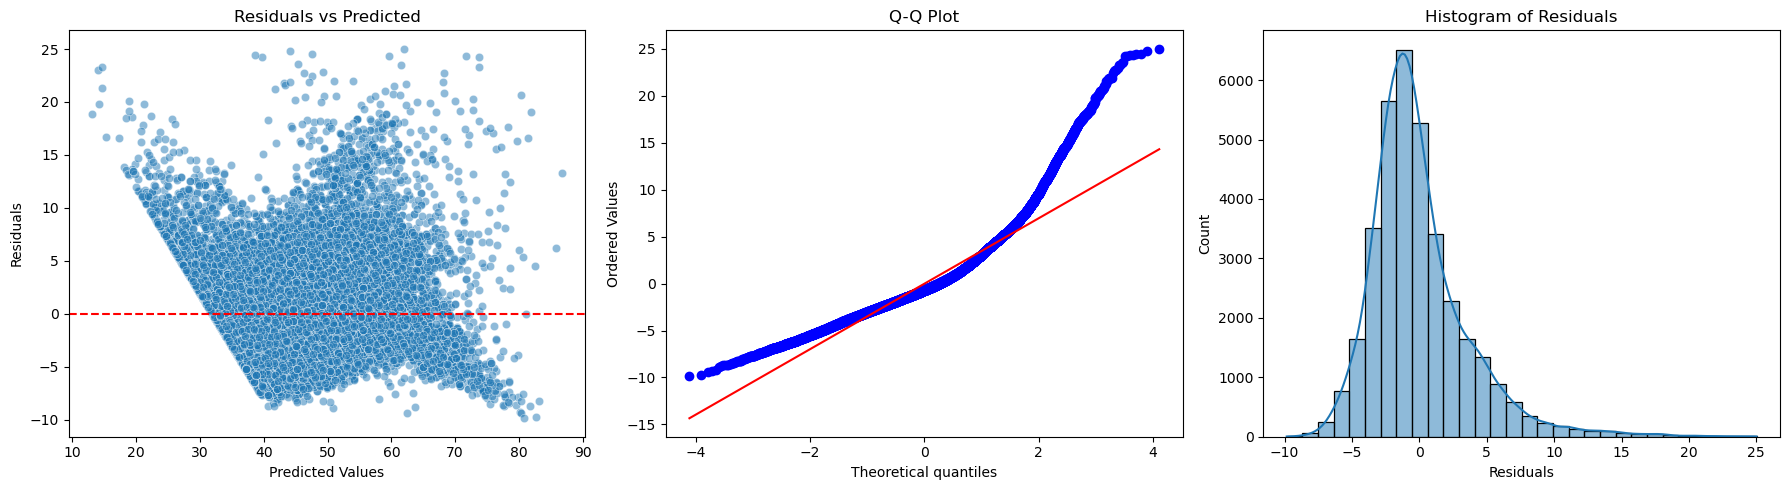

In [348]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - final_preds

# Set up subplots
plt.figure(figsize=(18, 5))

# Plot 1: Residuals vs Predicted
plt.subplot(1, 3, 1)
sns.scatterplot(x=final_preds, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot 2: Q-Q Plot
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")

# Plot 3: Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [365]:
# Compare the scaled vs unscaled features used in the final model
# coefficients on scaled data
scaled_lr = LinearRegression()
scaled_lr.fit(X_train_scaled[final_features], y_train)
coef_scaled = scaled_lr.coef_

# Model trained on unscaled data
unscaled_lr = LinearRegression()
unscaled_lr.fit(X_train[final_features], y_train)
coef_unscaled = unscaled_lr.coef_

# Create comparison DataFrame
coef_comparison = pd.DataFrame({
    "Feature": final_features,
    "Coefficient (Scaled)": coef_scaled,
    "Coefficient (Unscaled)": coef_unscaled
})

# Sort by absolute value of scaled coefficients
coef_comparison = coef_comparison.sort_values(by="Coefficient (Scaled)", key=abs, ascending=False)

# Display result
print("\n📊 Scaled vs. Unscaled Coefficients:")
print(coef_comparison)



📊 Scaled vs. Unscaled Coefficients:
                    Feature  Coefficient (Scaled)  Coefficient (Unscaled)
4  total_outstanding_orders             18.669965               18.669965
2     total_onshift_dashers            -13.216441              -13.216441
3        total_busy_dashers             -4.494163               -4.494163
5                  distance              4.148708                4.148708
0                  subtotal              2.528665                2.528665
6              created_hour             -2.177093               -2.177093
7                is_weekend              1.565388                1.565388
1        num_distinct_items              0.694234                0.694234


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [369]:
# Analyze the effect of a unit change in a feature, say 'total_items'
coef_comparison["abs_coef"] = coef_comparison["Coefficient (Unscaled)"].abs()
df_sorted = coef_comparison.sort_values("abs_coef", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Feature"], df_sorted["Coefficient (Unscaled)"])
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Effect of a Unit Change in Each Feature on Delivery Time (minutes)")
plt.xlabel("Coefficient (Unscaled) (minutes)")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the dataset had 6 numerical categorical variables. market_id, store_primary_category, order_protocol, order_day, order_hour, isWeekend. To train the model I have used isweekend and order hour. Orders placed on weekends increase delivery time by ~1.92 minutes. For every 1-hour increase, delivery time decreases by ~0.20 minutes . This could be because of lower traffic at night, making deliveries faster.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 means the dataset is split into 80% for training and 20% for testing. This means 80% of the data is used to train the model, while the remaining 20% is used to evaluate its performance.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> The heatmap reveals that distance has the strongest positive correlation with the delivery_time_mins variable.¶



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
> I have used boxplots to visualize the data distribution and identifying extreme values. Calculate the IQR, lower bound and upper bound. Any value outside these bounds is an outlier



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Distance, total items, and the number of distinct items in an order have a significant impact on delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression is a supervised learning technique used to predict a continuous outcome variable based on one or more input features. In simple linear regression, the model involves a single predictor and takes the form:     y = B₀ + B₁x + ε In contrast, multiple linear regression involves multiple predictors and is represented as:     y = B₀ + B₁x₁ + B₂x₂ + ... + Bₙxₙ + ε

The objective is to determine the optimal coefficients (B₀, B₁, ..., Bₙ) that minimize the sum of squared differences between the actual and predicted values, using the Ordinary Least Squares (OLS) method.

For accurate and reliable results, linear regression relies on several key assumptio- s:

A linear relationship between predictors and the t- rget

Independence of obser- ations

No multicollinearity among p- edictors

Constant variance of residuals (homosc- dasticity)

Normally distribu- ed residuals

Meeting these assumptions ensures the validity of model inferences and predictions.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple linear regression uses one independent variable to predict a continuous dependent variable, representing their relationship with a straight line:
y = B₀ + B₁x₁.
It is suitable for examining the direct influence of a single predictor on the outcome.

In contrast, multiple linear regression involves two or more independent variables to predict the dependent variable:
y = B₀ + B₁x₁ + B₂x₂ + ... + Bₙxₙ + ε.
This approach captures more complex relationships and accounts for the impact of multiple factors simultaneously.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Simple linear regression uses a single independent variable to predict a continuous dependent variable, modeling their relationship with a straight line: y = B₀ + B₁x₁. It is ideal for analyzing the direct effect of one predictor on the outcome.

Multiple linear regression, on the other hand, incorporates two or more independent variables to predict the dependent variable: y = B₀ + B₁x₁ + B₂x₂ + ... + Bₙxₙ + ε. This method allows for modeling more complex relationships and evaluating the combined influence of multiple predictors.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
> Overfitting and underfitting are common issues that affect model performance.

Overfitting occurs when a model learns not only the true patterns but also the noise in the training data, resulting in high accuracy on training data but poor generalization to new, unseen data.

Underfitting happens when a model is too simplistic to capture the underlying structure of the data, leading to poor performance on both training and test sets. A good model strikes a balance between the two, which can be validated by evaluating its performance on a separate test dataset.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots are crucial for evaluating the performance of a linear regression model. They illustrate the differences between the actual and predicted values (residuals), plotted against either the predicted values or independent variables. Ideally, residuals should appear randomly scattered without any distinct pattern, indicating that the model fits the data well. However, visible patterns—such as curves, unequal spread (heteroscedasticity), or clustering—can signal issues like non-linearity, violation of assumptions, or the need for data transformation. Overall, residual plots serve as a diagnostic tool to assess model validity and guide refinements for improved predictive accuracy.